**Install dependencies**

In [1]:
# !pip install -U pandas pillow
# !pip install -U cjm_pil_utils cjm_kaggle_utils

**Import dependencies**

In [2]:
# Import the random, pathlib, and PIL modules
import random
from pathlib import Path
from PIL import Image

import pandas as pd
pd.set_option('max_colwidth', None)  # Do not truncate the contents of cells in the DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in the DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame

In [3]:
from cjm_pil_utils.core import get_img_files
from cjm_kaggle_utils.core import save_kaggle_creds, dl_kaggle

**Enter Kaggle username and API token**

In [4]:
username = ""
key = ""

**Save Kaggle credentials to file**

In [5]:
save_kaggle_creds(username, key, overwrite=False)

Empty username.


**Set directory paths**

In [6]:
# Define path to store datasets
dataset_dir = Path("/mnt/980_1TB_2/Datasets/")
# Create the dataset directory if it does not exist
dataset_dir.mkdir(parents=True, exist_ok=True)
print(f"Dataset Directory: {dataset_dir}")

# Define path to store archive files
archive_dir = dataset_dir/'../Archive'
# Create the archive directory if it does not exist
archive_dir.mkdir(parents=True, exist_ok=True)
print(f"Archive Directory: {archive_dir}")

Dataset Directory: /mnt/980_1TB_2/Datasets
Archive Directory: /mnt/980_1TB_2/Datasets/../Archive


**Set Kaggle dataset**

In [7]:
# Set the name of the dataset
dataset_name = 'pexels-110k-512p-min-jpg'
# dataset_name = 'pexels-110k-768p-min-jpg'

# Construct the Kaggle dataset name by combining the username and dataset name
kaggle_dataset = f'innominate817/{dataset_name}'

# Create the path to the zip file that contains the dataset
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')
print(f"Archive Path: {archive_path}")

# Create the path to the directory where the dataset will be extracted
dataset_path = Path(f'{dataset_dir}/{dataset_name}')
print(f"Dataset Path: {dataset_path}")

Archive Path: /mnt/980_1TB_2/Datasets/../Archive/pexels-110k-512p-min-jpg.zip
Dataset Path: /mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg


**Download Kaggle dataset**

In [8]:
dl_kaggle(kaggle_dataset, archive_dir, dataset_path)

Dataset already downloaded


**Set path to image folder**

In [9]:
img_dir = Path(dataset_path/"images")
img_dir

PosixPath('/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images')

**Get source images**

In [10]:
# Get a list of the paths to the images in the images directory
img_paths = get_img_files(img_dir)

# Print the number of images in the images directory
print(f"Images: {len(img_paths)}")

Images: 109971


**Map image IDs to file paths**

In [11]:
# Create a dictionary mapping image IDs to image paths
img_path_dict = {int(path.stem.split('-')[-1]) : path for path in img_paths}

# Display the first few entries in the dictionary using a Pandas Dataframe
pd.DataFrame.from_dict(img_path_dict, orient='index').head()

,0
1061142,/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/1-art-background-1061142.jpg
2586334,/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/1-person-beauty-face-blurred-background-2586334.jpg
1460032,/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/1-wtc-artist-concert-1460032.jpg
1061133,/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/10-art-artistic-1061133.jpg
1339845,/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/images/10-art-color-1339845.jpg


**Store list of image IDs**

In [12]:
img_ids = list(img_path_dict.keys())
len(img_ids)

109971

**Define path to image attribute data**

In [13]:
# Set the file path for the attributes dataframe
attributes_df_json_file = Path(dataset_path/'attributes_df.json')

# Print the file path
print(attributes_df_json_file)

/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/attributes_df.json


**Import image attributes**

In [14]:
# Read the attributes dataframe from the JSON file
attributes_df = pd.read_json(attributes_df_json_file)

# Print the number of entries in the dataframe
print(f"Number of entries: {len(attributes_df)}")

# Display the first few rows of the dataframe
attributes_df.head().transpose()

Number of entries: 109971


,3186010,3185509,3182800,3184308,3185747
title,Pink and White Ice Cream Neon Signage,Garnishing of Syrup on a Cheesecake,People in Front of the Computers,Photo Of People Next To Each Other,Aerial View of Coconut Trees at Rural Area
aspect_ratio,0.749809,1.0,1.498501,1.5,1.499795
main_color,"[128, 38, 77]","[185, 167, 164]","[176, 175, 169]","[201, 179, 150]","[154, 139, 128]"
colors,"[#000000, #a52a2a, #bc8f8f, #c71585, #d02090, #d8bfd8]","[#000000, #696969, #bc8f8f, #cd5c5c, #d3d3d3]","[#000000, #696969, #a9a9a9, #add8e6, #f5f5f5]","[#708090, #a0522d, #cd853f, #eedd82, #ffdab9]","[#696969, #808080]"
tags,"[bright, chocolate, close-up, cold, cream, creamy, cup, dairy product, delicious, design, dessert, electricity, epicure, flavors, fluorescent, food, food photography, goody, hand, ice cream, icecream, illuminated, indulgence, light pink background, neon, neon lights, neon sign, pastry, pink background, pink wallpaper, scoop, sweet, sweets, tasty]","[cheesecake, dessert, epicure, food photography, food plating, food porn, food preparation, food styling, garnishing, gastronomy, glaze, syrup]","[colleagues, computer, connection, cooperation, desk, dreadlocks, employees, facial expression, furniture, indoors, internet, looking, office, people, room, sit, sitting, table, teamwork, technology, women, work, working, workplace]","[adults, casual, communication, conversation, fashion, fashionable, fun, gather, gathered, gathering, happiness, happy, leisure, outfit, recreation, sit, sitting, smile, smiling, style, stylish, wear]","[aerial shot, coconut trees, daylight, drone shot, exotic, high angle shot, outdoors, palm trees, sand, summer, trees, tropical]"
adult,very_unlikely,very_unlikely,unlikely,unlikely,None
aperture,1.8,NaN,NaN,NaN,2.6
camera,iPhone X,,None,None,FC1102
focal_length,4.0,NaN,NaN,NaN,4.49
google_place_id,ChIJkUjxJ7it1y0R4qOVTbWHlR4,None,None,None,None


**Get only image titles**

In [15]:
# Create a dataframe of the 'title' column from the attributes dataframe
title_df = attributes_df['title'].to_frame()

# Display the first few rows of the dataframe
title_df.head()

,title
3186010,Pink and White Ice Cream Neon Signage
3185509,Garnishing of Syrup on a Cheesecake
3182800,People in Front of the Computers
3184308,Photo Of People Next To Each Other
3185747,Aerial View of Coconut Trees at Rural Area


**Get image ids**

In [16]:
# Create a list of the indexes of the attributes dataframe
img_ids = attributes_df.index.to_list()

# Print the first index from the list
print(img_ids[0])

3186010


**Display sample image**

ID: 1698966
Title: White Quadcopter Drone on Top of Brown Soil
Tags: clouds, daylight, drone, landscape, mountains, nature, outdoors, propellers, sky


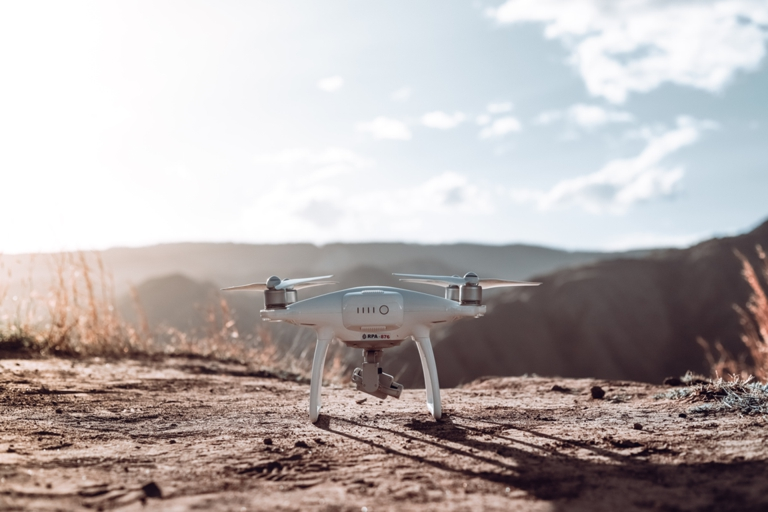

In [17]:
# Choose a random image ID from the list of image IDs
img_id = random.choice(img_ids)

print(f"ID: {img_id}")

# Open the image located at the path in the img_path_dict with the key of the current img_id
sample_img = Image.open(img_path_dict[img_id])

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[img_id]['title']}")

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Tags: {', '.join(attributes_df.loc[img_id]['tags'])}")

# Display the image
sample_img

**Inspect tags for selected image**

In [18]:
# Retrieve the list of tags for the current image (identified by img_id)
# from the 'tags' column in the attributes_df dataframe
attributes_df.loc[img_id]['tags']

['clouds',
 'daylight',
 'drone',
 'landscape',
 'mountains',
 'nature',
 'outdoors',
 'propellers',
 'sky']

**Search dataset for a specific tag**

In [19]:
# Define the search term
tag_term = 'golden hour'

# Create a mask for the attributes_df dataframe to identify rows where the 'tags' column contains the search term
mask = attributes_df.tags.apply(lambda x: tag_term in x if x is not None else False)

# Create a new dataframe containing only the rows that match the mask
results_df = attributes_df[mask]

# Print the number of rows in the resulting dataframe
print(f"Found {len(results_df)} entries")

# Display the first few rows of the resulting dataframe
results_df.head().transpose()

Found 1293 entries


,3157917,3150702,3157967,3170887,3163677
title,Photo Of Sunset During Dawn,Aerial Photography of City Buildings During Golden Hour,Calm Sea During Golden Hour,Photo of Trees During Golden Hour,Photo Of People In Front Of Mosque During Golden Hour
aspect_ratio,1.333234,0.669421,1.5,0.666667,1.509804
main_color,"[152, 118, 96]","[137, 102, 94]","[119, 107, 97]","[142, 140, 132]","[189, 145, 91]"
colors,"[#000000, #deb887, #e9967a]","[#000000, #696969, #ff7f50, #ffa07a]","[#000000, #faebd7]","[#000000, #dcdcdc]","[#8b4513, #deb887, #faebd7]"
tags,"[afterglow, calm, dawn, dusk, environment, golden hour, horizon, idyllic, nature, nature photography, ocean, peaceful, ripples, scenery, scenic, sea, seascape, sun, sunbeam, sunrise, sunset, tranquil]","[city, dawn, dusk, fog, foggy, golden hour, hills, morning, scenery, scenic, silhouette, sky, sunrise, sunset, urban, view]","[clouds, dawn, dusk, golden hour, horizon, islands, ocean, outdoors, rock formation, sea, seashore, shore, sky, sunrise, sunset, travel, water]","[dawn, dusk, environment, forest, golden hour, horizon, nature, outdoors, scenery, trees, woods]","[arches, architectural building, architectural design, architectural detail, architecture, belief, blue mosque, building, celebration, crowd, crowded, culture, dawn, daylight, delhi, domes, dusk, eid, exterior, faith, gathering, golden hour, grand mosque, historic, historical building, house of worship, islam, islamic architecture, jama, landmark, masjid, minarets, monument, mosque, muslim, muslims, outdoors, people, pillars, prayers, praying, ramadan, religion, religious, sacred, salah, sheikh zayed mosque, spirituality, square, sultan ahmed mosque, sun, sunbeam, sunlight, sunrays, sunrise, sunset, sunshine, temple, towers, tradition, traditional, travel, trust, turning point, worship]"
adult,very_unlikely,very_unlikely,very_unlikely,None,very_unlikely
aperture,1.7,5.6,7.1,1.8,11.0
camera,ONEPLUS A6013,NIKON D3000,Canon EOS 6D,Canon EOS Kiss X7,NIKON D7000
focal_length,4.25,70.0,30.0,50.0,18.0
google_place_id,ChIJCxgesixFDhMR0oAyeQNvqig,None,None,None,None


**Get image IDs from search results**

In [20]:
# Retrieve a list of the image IDs for the entries in the results_df dataframe
results_df_img_ids = results_df.index.to_list()

# Print the first image ID in the list
print(results_df_img_ids[0])

3157917


**Select an image ID**

In [21]:
# Choose a random image ID from the list of image IDs in the results_df dataframe
results_img_id = random.choice(results_df_img_ids)

# Print the chosen image ID
print(results_img_id)

1586588


**Inspect an image from the search results**

Title: Silhouette of Rock Formation at Shore


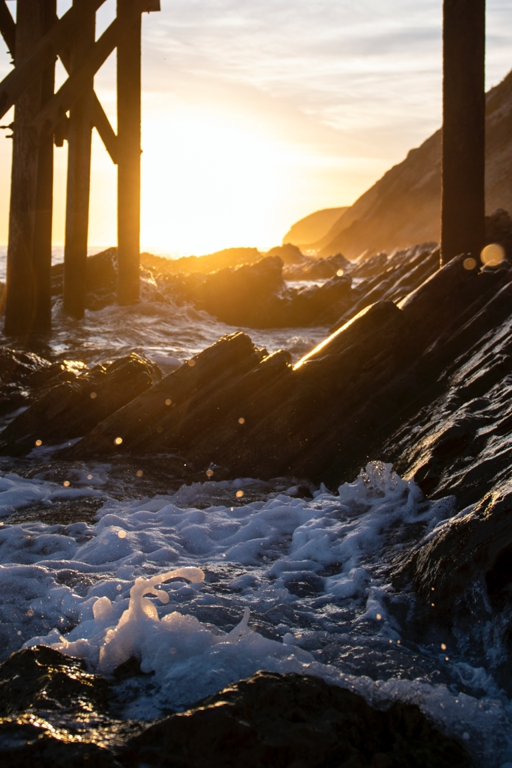

In [22]:
# Open the image located at the path in the img_path_dict with the key of the current results_img_id
sample_img = Image.open(img_path_dict[results_img_id])

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[results_img_id]['title']}")

# Display the image
sample_img